 - In this Loan Status Prediction dataset, we have the data of applicants those who previously applied for the loan based on the property which is Property Loan.
- The bank will decide whether to give a loan for the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc..,
- Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.
- In this project, we are going to classify an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan which is taken previously, and many more factors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('loan.csv')
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


# Data Understanding
- Gender : Applicant Gender
- Married: Applicant Married or not
- Dependents : How many people became dependent on the person
- Education : Applicant is Graduate or not
- Self_Employed : Applicant is self employed or not
- Applicant_Income :person anuval income
- Coapplicant_Income : coapplicant income if it is mutual loan 
- Loan_Amount : amount of loan
- Term : How many terms amount will repay
- Credit_History:1-yes/ 0-no
- Area: where the person is living ( Urban/Rural/Semiurban)
- Status: Y-loan approved / N-loan declined

In [3]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
459,Male,Yes,0,Graduate,No,833400,0.0,16000000,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [5]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [6]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [7]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [8]:
continous=[]
descrite=[]
for i in df.columns:
    if df[i].dtype=='object':
        descrite.append(i)
    else:
        continous.append(i)

In [9]:
for i in descrite:
    print(df[i].value_counts(),end='\n\n')
    

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

Y    422
N    192
Name: Status, dtype: int64



# Data Visualization

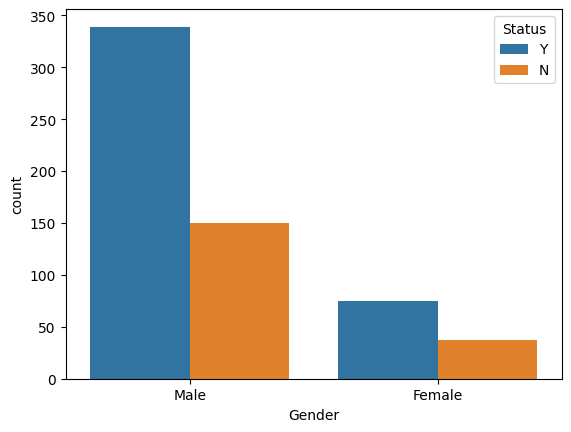

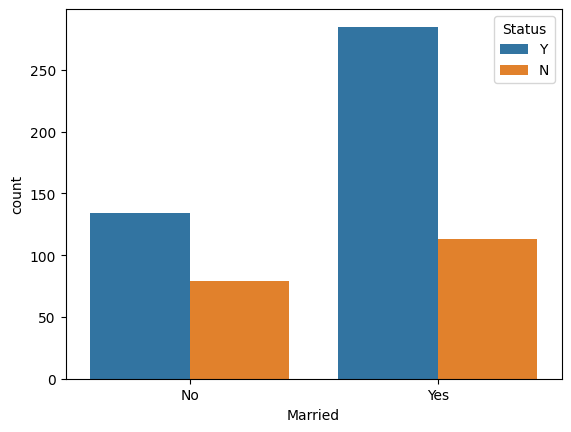

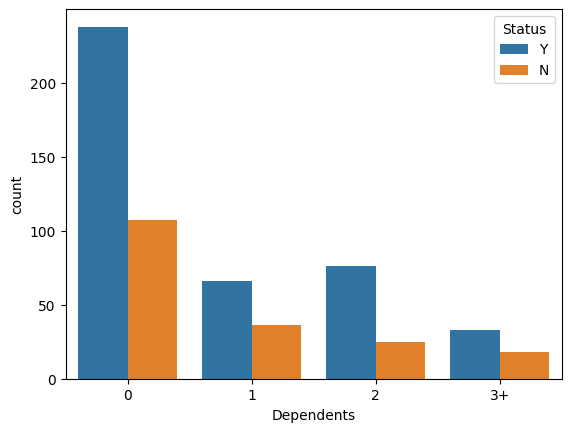

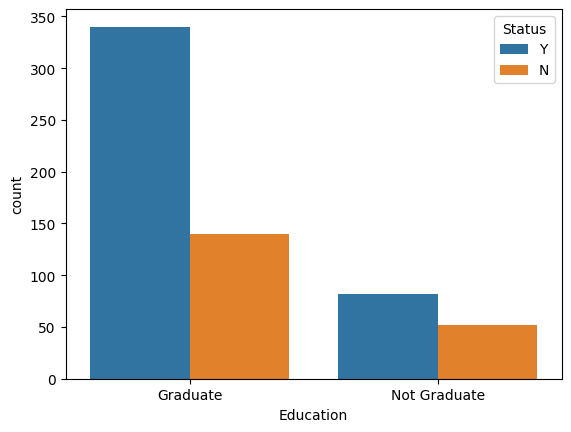

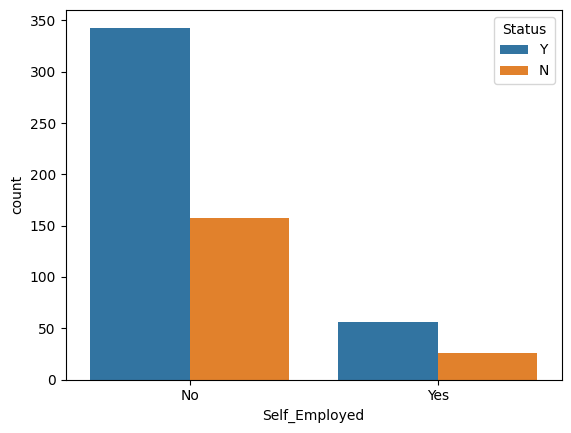

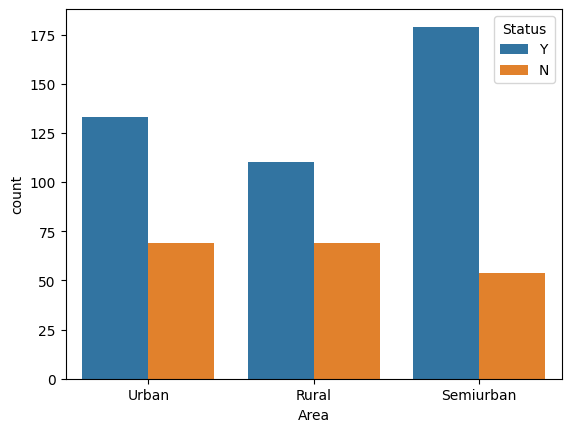

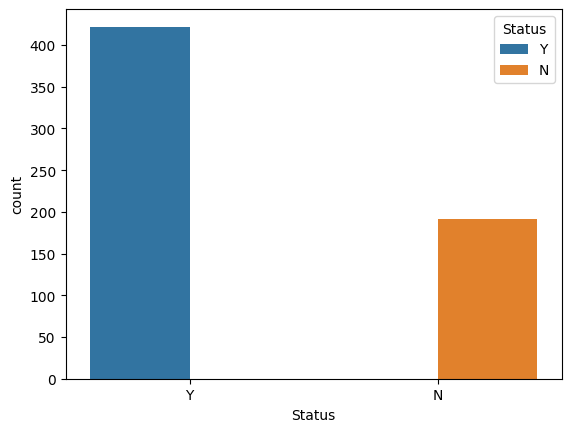

In [10]:
for i in descrite:
    sns.countplot(x=df[i],hue=df['Status'])
    plt.show()

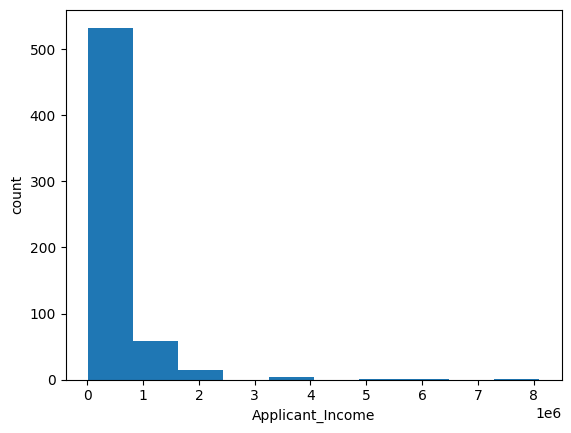

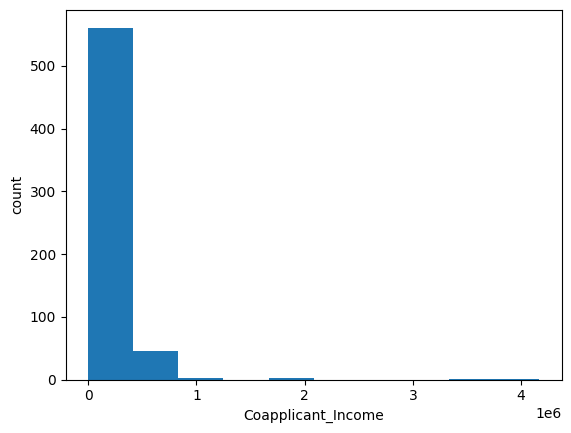

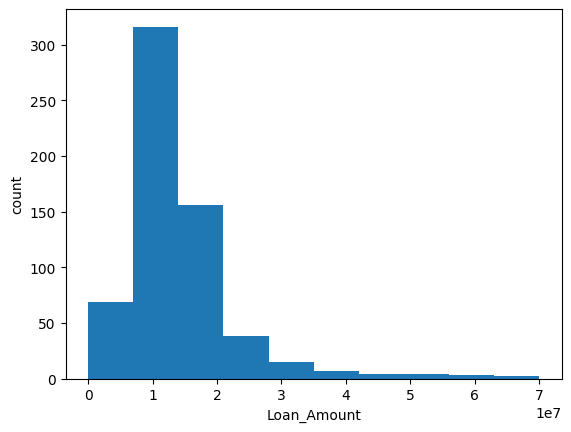

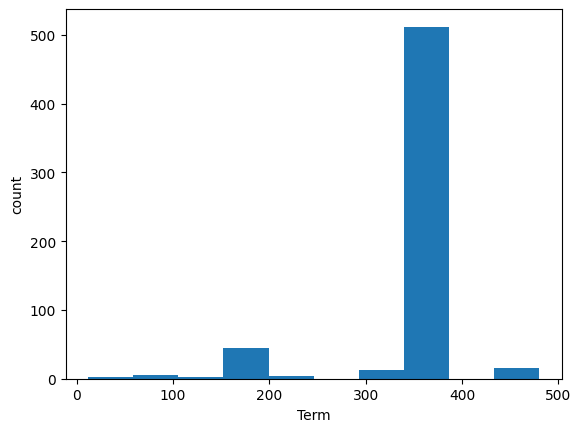

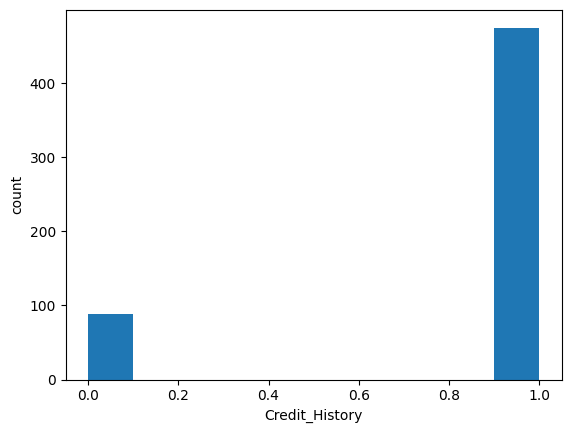

In [11]:
for i in continous:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

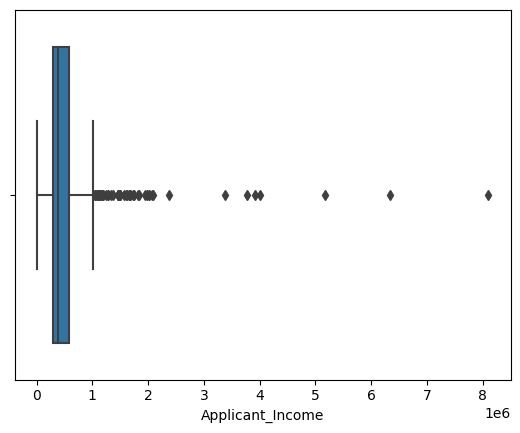

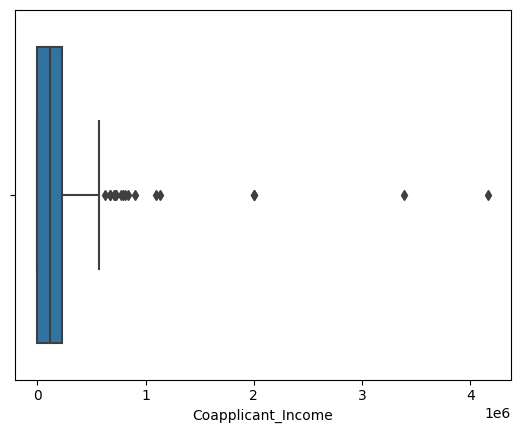

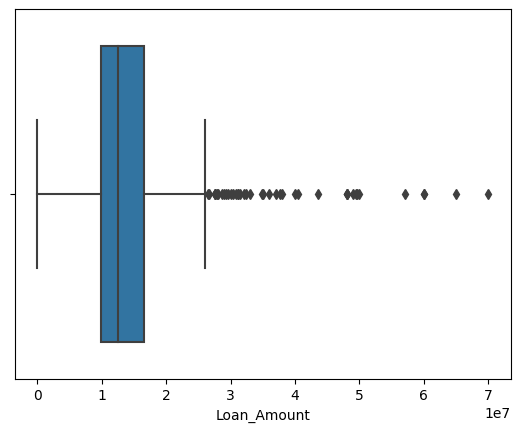

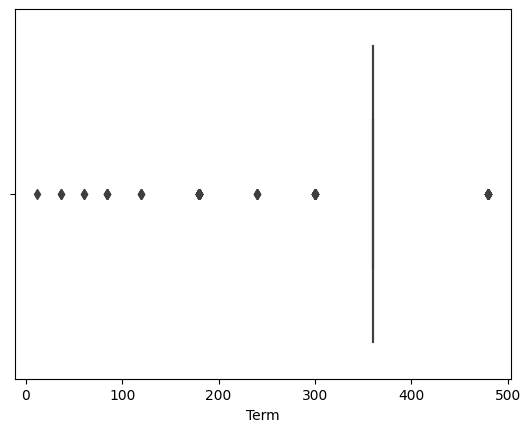

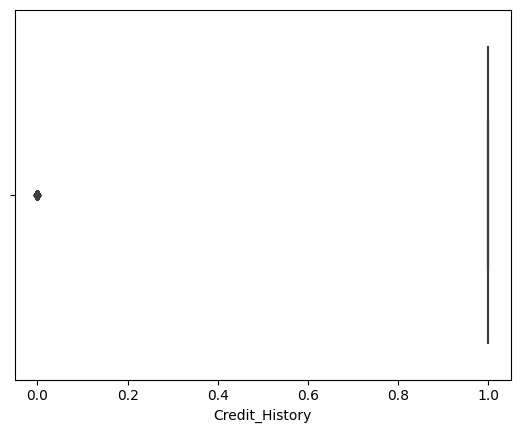

In [12]:
for i in continous:
    sns.boxplot(x=df[i])
    plt.show()

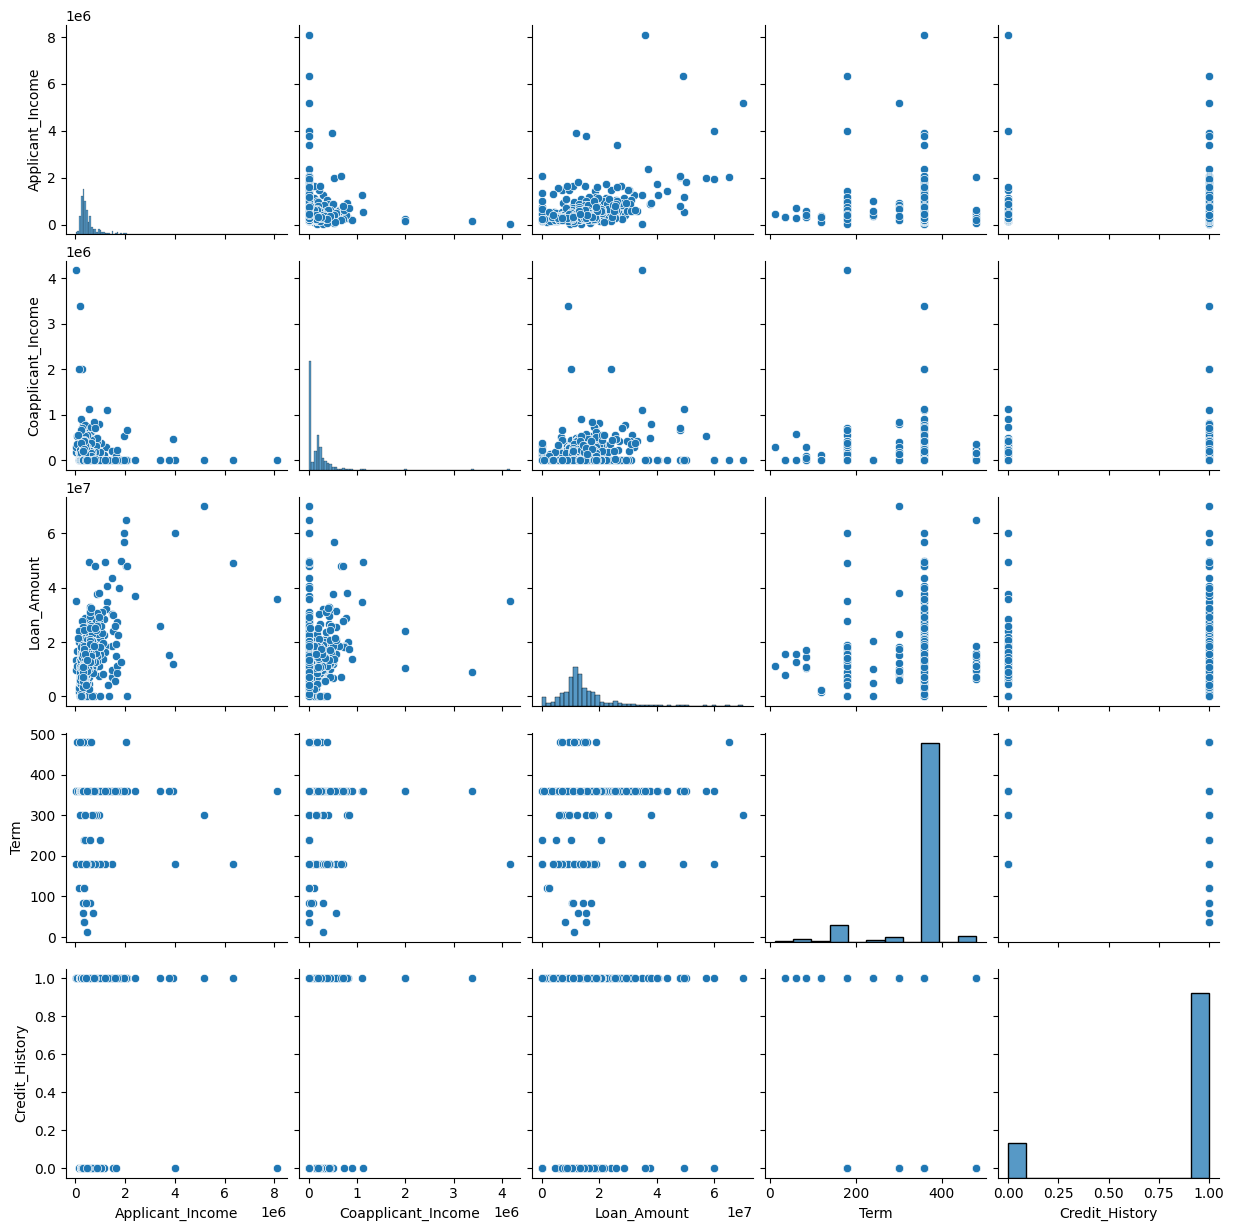

In [13]:
sns.pairplot(df,vars=continous)
plt.show()

# Data Cleaning

In [14]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum()==0:
        continue
    else:
        null_columns.append(i)

In [15]:
for i in null_columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

# Data Wrangling

In [17]:
for i in continous:
    print(i," skew:",df[i].skew())

Applicant_Income  skew: 6.5395131139946185
Coapplicant_Income  skew: 7.491531216657304
Loan_Amount  skew: 2.3754622597568487
Term  skew: -2.4021122563890396
Credit_History  skew: -2.0219705924848985


In [18]:

(df['Applicant_Income']**(1/10)).skew()

0.9777929615283963

In [19]:
(df['Coapplicant_Income']**(1/2)).skew()

0.9795605436152071

In [20]:
(df['Loan_Amount']**(1/2)).skew()

-0.0637393327998326

In [21]:
df['Applicant_Income']=df['Applicant_Income']**(1/10)
df['Coapplicant_Income']=df['Coapplicant_Income']**(1/2)
df['Loan_Amount']=df['Loan_Amount']**(1/2)

In [22]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in descrite:
    df[i] = le.fit_transform(df[i])

In [23]:
#df=pd.get_dummies(df,drop_first=True)

In [24]:
df.shape

(614, 12)

In [25]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,3.773186,0.000000,3872.983346,360.0,1.0,2,1
1,1,1,1,0,0,3.682265,388.329757,3577.708764,360.0,1.0,0,0
2,1,1,0,0,1,3.529491,0.000000,2569.046516,360.0,1.0,2,1
3,1,1,0,1,0,3.477062,485.592422,3464.101615,360.0,1.0,2,1
4,1,0,0,0,0,3.782815,0.000000,3754.996671,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,3.517546,0.000000,2664.582519,360.0,1.0,0,1
610,1,1,3,0,0,3.642016,0.000000,2000.000000,180.0,1.0,0,1
611,1,1,1,0,0,3.896710,154.919334,5029.910536,360.0,1.0,2,1
612,1,1,2,0,0,3.872435,0.000000,4324.349662,360.0,1.0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Dependents          614 non-null    int64  
 3   Education           614 non-null    int64  
 4   Self_Employed       614 non-null    int64  
 5   Applicant_Income    614 non-null    float64
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    int64  
 11  Status              614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [27]:
x=df.drop('Status',axis=1)
y=df['Status']

In [28]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [29]:
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(x_train,y_train)

# prediction
ypred_train_logistic=model_logistic.predict(x_train)
ypred_test_logistic=model_logistic.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train_logistic))
print("test accuracy:",accuracy_score(y_test,ypred_test_logistic))

from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_logistic,x,y,cv=5).mean())

train accuracy: 0.8004073319755601
test accuracy: 0.8455284552845529
cv: 0.809462881514061


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test_logistic)

array([[23, 17],
       [ 2, 81]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test_logistic))

              precision    recall  f1-score   support

           0       0.92      0.57      0.71        40
           1       0.83      0.98      0.90        83

    accuracy                           0.85       123
   macro avg       0.87      0.78      0.80       123
weighted avg       0.86      0.85      0.83       123



#  KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

ypred_train_knn=knn_model.predict(x_train)
ypred_test_knn=knn_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_knn))
print("test accuracy:",accuracy_score(y_test,ypred_test_knn))

print("cv:",cross_val_score(knn_model,x,y,cv=5).mean())

train accuracy: 0.814663951120163
test accuracy: 0.8211382113821138
cv: 0.6400239904038385


In [34]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':[20,21,22,23,24],'p':[1,2]}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 22, 'p': 2}

In [35]:

knn_model=KNeighborsClassifier(n_neighbors=20,p=2)
knn_model.fit(x_train,y_train)

ypred_train_knn=knn_model.predict(x_train)
ypred_test_knn=knn_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_knn))
print("test accuracy:",accuracy_score(y_test,ypred_test_knn))

print("cv:",cross_val_score(knn_model,x,y,cv=5).mean())

train accuracy: 0.7963340122199593
test accuracy: 0.8455284552845529
cv: 0.6563507930161269


# SVM 

In [36]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)

ypred_train_svm=svm_model.predict(x_train)
ypred_test_svm=svm_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_svm))
print("test accuracy:",accuracy_score(y_test,ypred_test_svm))

print("cv:",cross_val_score(svm_model,x,y,cv=5).mean())

train accuracy: 0.8126272912423625
test accuracy: 0.8455284552845529
cv: 0.6872984139677463


In [37]:
estimator=SVC()
param_grid={'C':[0.002,0.003,0.004,0.2,0.3],'kernel':['linear','rbf','sigmoid','poly']}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'C': 0.2, 'kernel': 'poly'}

In [38]:
svm_model=SVC(kernel='poly',C=0.2)
svm_model.fit(x_train,y_train)

ypred_train_svm=svm_model.predict(x_train)
ypred_test_svm=svm_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_svm))
print("test accuracy:",accuracy_score(y_test,ypred_test_svm))

print("cv:",cross_val_score(svm_model,x,y,cv=5).mean())

train accuracy: 0.814663951120163
test accuracy: 0.8455284552845529
cv: 0.6872984139677463


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

ypred_train_dt=dt_model.predict(x_train)
ypred_test_dt=dt_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_dt))
print("test accuracy:",accuracy_score(y_test,ypred_test_dt))

print("cv:",cross_val_score(dt_model,x,y,cv=5).mean())

train accuracy: 1.0
test accuracy: 0.7235772357723578
cv: 0.7004398240703719


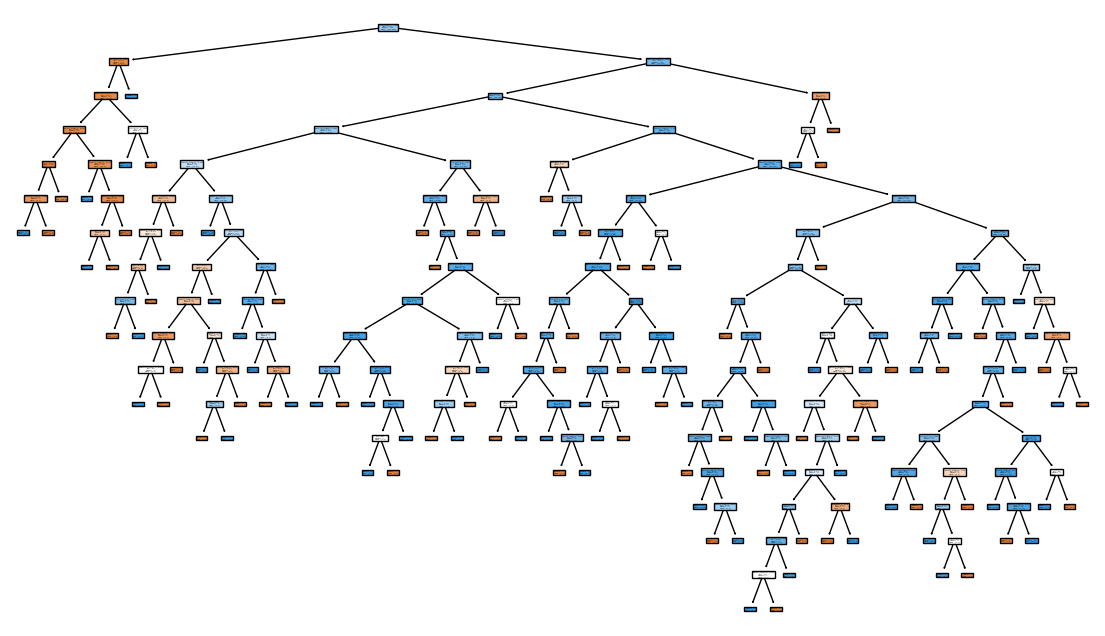

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_model,filled=True,feature_names=x.columns)
plt.show()

In [41]:
dt_model.feature_importances_

array([0.02106167, 0.0300527 , 0.04748732, 0.01689802, 0.02104774,
       0.19410702, 0.12964584, 0.17381716, 0.06042351, 0.26290821,
       0.0425508 ])

In [42]:
term=0.04908333
area=0.0473152
self_employed=0.02740027
Education=0.00462232
Dependents=0.05617318
married=0.0205239
gender=0.02106167
credit_history=0.26290821
loan_amount=0.1963987
coapplicant_income=0.13811224
applicant_income=0.17640098

In [43]:
estimator=DecisionTreeClassifier(random_state=999)
param_grid={"criterion":['gini','entropy'],"max_depth":list(range(16))}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [44]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=1)
dt_model.fit(x_train,y_train)

ypred_train_dt=dt_model.predict(x_train)
ypred_test_dt=dt_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_dt))
print("test accuracy:",accuracy_score(y_test,ypred_test_dt))

print("cv:",cross_val_score(dt_model,x,y,cv=5).mean())

train accuracy: 0.8004073319755601
test accuracy: 0.8455284552845529
cv: 0.809462881514061


#  Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

ypred_train_rf=rf_model.predict(x_train)
ypred_test_rf=rf_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_rf))
print("test accuracy:",accuracy_score(y_test,ypred_test_rf))
print("cv:",cross_val_score(rf_model,x,y,cv=5).mean())

train accuracy: 1.0
test accuracy: 0.8373983739837398
cv: 0.7964147674263627


In [46]:
rf_model.feature_importances_

array([0.01620684, 0.02511891, 0.05018733, 0.02427904, 0.01735009,
       0.21183984, 0.12164141, 0.19353739, 0.04312118, 0.244257  ,
       0.05246097])

In [47]:
estimator=RandomForestClassifier(random_state=0)
param_grid={"n_estimators":list(range(101))}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_estimators': 7}

In [48]:
rf_model=RandomForestClassifier(n_estimators=7)
rf_model.fit(x_train,y_train)

ypred_train_rf=rf_model.predict(x_train)
ypred_test_rf=rf_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_rf))
print("test accuracy:",accuracy_score(y_test,ypred_test_rf))
print("cv:",cross_val_score(rf_model,x,y,cv=5).mean())

train accuracy: 0.9796334012219959
test accuracy: 0.7967479674796748
cv: 0.7850059976009596


# Ada boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ab_model=AdaBoostClassifier()
ab_model.fit(x_train,y_train)

ypred_train_ab=ab_model.predict(x_train)
ypred_test_ab=ab_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_ab))
print("test accuracy:",accuracy_score(y_test,ypred_test_ab))
print("cv:",cross_val_score(ab_model,x,y,cv=5).mean())

train accuracy: 0.835030549898167
test accuracy: 0.8292682926829268
cv: 0.783353325336532


In [50]:
estimator=AdaBoostClassifier()
param_grid={"n_estimators":list(range(51))}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_estimators': 1}

In [51]:
ab_model=AdaBoostClassifier(n_estimators=1)
ab_model.fit(x_train,y_train)

ypred_train_ab=ab_model.predict(x_train)
ypred_test_ab=ab_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_ab))
print("test accuracy:",accuracy_score(y_test,ypred_test_ab))
print("cv:",cross_val_score(ab_model,x,y,cv=5).mean())

train accuracy: 0.8004073319755601
test accuracy: 0.8455284552845529
cv: 0.809462881514061


#  Gradient Boost

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

ypred_train_gb=gb_model.predict(x_train)
ypred_test_gb=gb_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_gb))
print("test accuracy:",accuracy_score(y_test,ypred_test_gb))
print("cv:",cross_val_score(gb_model,x,y,cv=5).mean())

train accuracy: 0.8940936863543788
test accuracy: 0.8130081300813008
cv: 0.7802079168332667


In [53]:
estimator=AdaBoostClassifier()
param_grid={"n_estimators":[8,9,10,11],'learning_rate':[0.1,0.2,0.3,0.5,0.7,0.8,0.9,1]}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'learning_rate': 0.1, 'n_estimators': 8}

In [54]:
gb_model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=8)
gb_model.fit(x_train,y_train)

ypred_train_gb=gb_model.predict(x_train)
ypred_test_gb=gb_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_gb))
print("test accuracy:",accuracy_score(y_test,ypred_test_gb))
print("cv:",cross_val_score(gb_model,x,y,cv=5).mean())

train accuracy: 0.8065173116089613
test accuracy: 0.8373983739837398
cv: 0.8029588164734107


# XG boost

In [55]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)

ypred_train_xgb=xgb_model.predict(x_train)
ypred_test_xgb=xgb_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_xgb))
print("test accuracy:",accuracy_score(y_test,ypred_test_xgb))
print("cv:",cross_val_score(xgb_model,x,y,cv=5).mean())

train accuracy: 1.0
test accuracy: 0.8048780487804879
cv: 0.7654671464747435


In [56]:
#pip install xgboost

In [57]:
estimator=XGBClassifier()
param_grid={"n_estimators":[0,1],'max_depth':list(range(16)),'gamma':[0,0.1,0.5,1]}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'gamma': 0, 'max_depth': 1, 'n_estimators': 1}

In [58]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(gamma=0,max_depth=1,n_estimators=1)
xgb_model.fit(x_train,y_train)

ypred_train_xgb=xgb_model.predict(x_train)
ypred_test_xgb=xgb_model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train_xgb))
print("test accuracy:",accuracy_score(y_test,ypred_test_xgb))
print("cv:",cross_val_score(xgb_model,x,y,cv=5).mean())

train accuracy: 0.8004073319755601
test accuracy: 0.8455284552845529
cv: 0.809462881514061


# Load model 

In [59]:
# best model is Logistic Regression

In [60]:
import pickle
pickle.dump(model_logistic,open('loan_model.pkl','wb'))

 - We have built a Logistic Regression which performs having the Training accuracy of 80.04% and Testing accuracy of 84.55%.